<a href="https://colab.research.google.com/github/Raavvone/Internship_Projects/blob/main/OLA_analyss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLA CASE STUDY ANALYSIS**

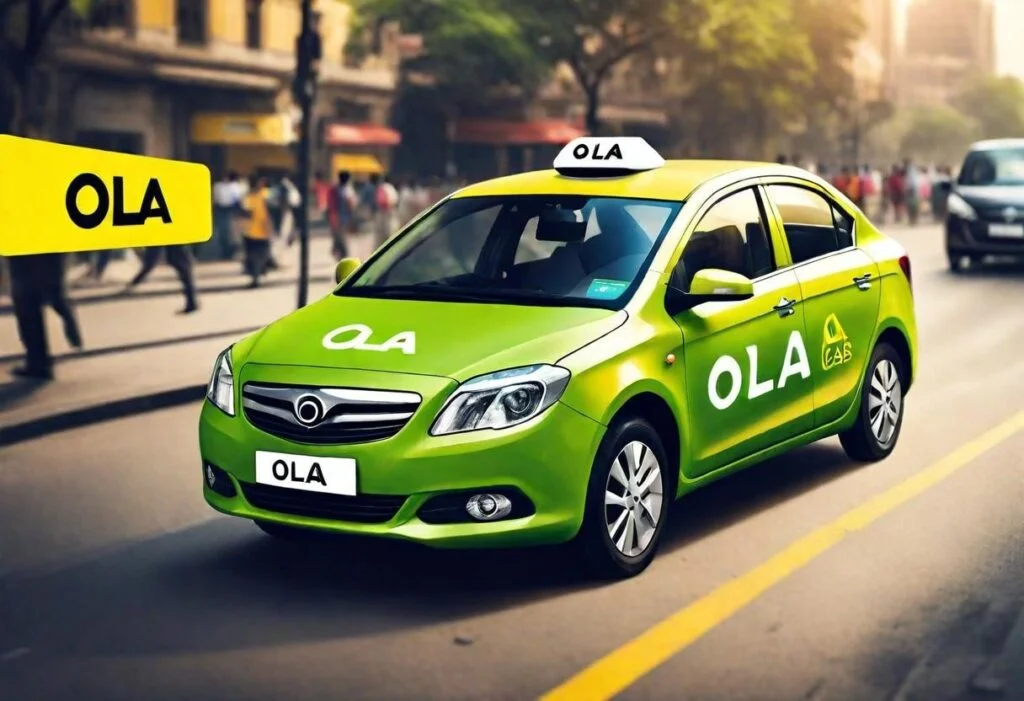

# Problem Statemnet:

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates. As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

# Objective:

Analyze the given driver dataset to understand:

*   Which factors contribute to drivers leaving the platform.
*   How demographic, income, rating, and trip data relate to attrition.
*   What insights Ola can use to reduce churn and improve retention.

# Data Structure and Overview

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # importing liabraries

In [40]:
# First look of the dataset

df= pd.read_csv("/content/ola_driver.csv")
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


# Dataset Shape

In [41]:
df.shape

(19104, 14)

The dataset has 19,104 rows and 14 columns.

# Data Types of Each Column

In [42]:
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


Most of the columns have integer, float and String data types.

Data Overview:

Numeric columns:

● Driver_ID: Unique ID for drivers

● Age: Age of the driver

● Gender: Gender of the driver (Male: 0, Female: 1)

● Education_Level: Education level (0 for 10+, 1 for 12+, 2 for graduate)

● Income: Monthly average Income of the driver

● Joining Designation: Designation of the driver at joining

● Grade: Grade of the driver at reporting

● Total Business Value: Total business value acquired (negative indicates
cancellation/refund or car EMI adjustments)

● Quarterly Rating: Quarterly rating of the driver (1-5, higher is better)

Categorical columns:

● MMMM-YY: Reporting Date (Monthly)

● City: City Code of the driver

Date columns:

● Date Of Joining: Joining date for the driver

● LastWorkingDate: Last date of working for the driver


# Missing Value Summary

In [43]:
df.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488



*   Age has 61 missing values
*   Gender has 52 missing values
*   LastWorkingDate has 17,488 missing values

# Descriptive Statistics:

In [44]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


This table shows the mean, min, max, count and standard deviation of all the numeric columns of the dataset

Observation:

By looking at the descriptive statistics, I noticed that the dataset covers a wide range of features such as age, income, and performance ratings of drivers. For example, the age and income values show considerable spread indicating a diverse driver base.

Insight:

While the company seems to hire a large number of drivers, the monthly hiring trend isn't stable. There is one particular month where driver onboarding was unusually high, which may point to a specific campaign or event. Interestingly, some drivers have negative 'Total Business Value' which is unexpected and might be refund scenarios.

# Descriptive Statistics of  Age, Income, Total Business Value, and Quarterly Rating

In [45]:
numerical_cols = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']
# Descriptive statistics
desc_stats = df[numerical_cols].agg(['mean', 'median', 'std']).T
desc_stats.columns = ['Mean', 'Median', 'Standard Deviation']
print(desc_stats)

                               Mean    Median  Standard Deviation
Age                       34.668435      34.0        6.257912e+00
Income                 65652.025126   60087.0        3.091452e+04
Total Business Value  571662.074958  250000.0        1.128312e+06
Quarterly Rating           2.008899       2.0        1.009832e+00


# Unique Drivers

In [46]:

unique_drivers=len(df["Driver_ID"].unique())

In [47]:
print(unique_drivers)

2381


So there are 2381 unique drivers that are there

# Temporal Analysis:

In [48]:
# converting 'Dateofjoining' and 'LastWorkingDate' into datetime format
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


/tmp/ipython-input-48-299886918.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
/tmp/ipython-input-48-299886918.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


converting 'Dateofjoining' and 'LastWorkingDate' into datetime format

In [49]:
# Count drivers joined each month
joined = df['Dateofjoining'].dt.to_period('M').value_counts().sort_index()
joined_df = joined.reset_index()
joined_df.columns = ['Month', 'Drivers Joined']

print("Drivers Joined Each Month:\n", joined_df)

Drivers Joined Each Month:
       Month  Drivers Joined
0   2013-04              31
1   2013-05              24
2   2013-06              59
3   2013-07              63
4   2013-08              33
..      ...             ...
80  2020-08             325
81  2020-09             314
82  2020-10             139
83  2020-11              93
84  2020-12              59

[85 rows x 2 columns]


/tmp/ipython-input-50-2245469465.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=20)


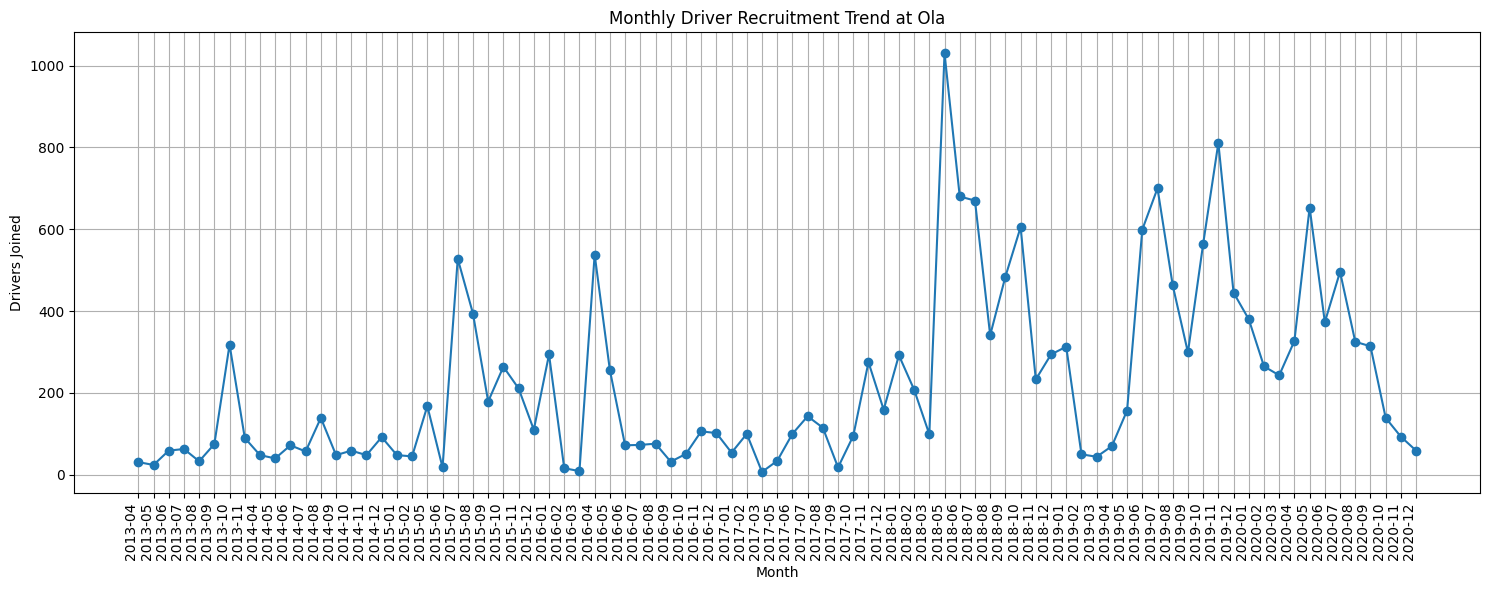

In [50]:
# Converting 'Month' to string for proper labeling
joined_df['Month'] = joined_df['Month'].astype(str)

plt.figure(figsize=(15,6))
plt.plot(joined_df['Month'], joined_df['Drivers Joined'], marker='o')

# Rotating x-axis labels for readability
plt.xticks(rotation=90, ha='right')

# Showing fewer labels to avoid clutter
plt.locator_params(axis='x', nbins=20)

# labels and titles
plt.xlabel('Month')
plt.ylabel('Drivers Joined')
plt.title('Monthly Driver Recruitment Trend at Ola')
plt.tight_layout()
plt.grid(True)
plt.show()

Observation:



*   Ola’s driver hiring has been quite inconsistent, going up and down each month which is  not a smooth trend.

*   A major spike is seen in April 2018, where over 1000 drivers joined which is much higher than usual and really stands out.
*   During 2013–2014, the numbers were pretty low, likely because Ola was still new and expanding.


*   From 2015 onwards, there's a clear increase, possibly when Ola started scaling operations more aggressively.


*   Between 2017 and 2019, there are frequent recruitment spikes, suggesting seasonal or demand-based hiring drives maybe due to festivals, new city launches, or promotions.
*   In 2020, there’s a sharp drop in hiring, most likely due to the impact of COVID-19 and nationwide lockdowns.






Insight:

*   Ola seems to have grown its driver base rapidly, especially between 2015 and 2019, which shows they were aggressively expanding.



*   The high and low fluctuations suggest they might have been doing batch-wise recruitment or reacting to short-term demand.
*   The dip in 2020 is a clear indicator of how external factors like the pandemic impacted their operations.



*   These trends might also point to a retention issue — if they were hiring frequently, maybe they were losing drivers just as fast.
*   Going forward, Ola might need to focus more on retaining drivers and reducing churn instead of just hiring in large numbers every few months.









In [51]:
# Count drivers left each month
left = df['LastWorkingDate'].dropna().dt.to_period('M').value_counts().sort_index()
left_df = left.reset_index()
left_df.columns = ['Month', 'Drivers Left']

print("\nDrivers Left Each Month:\n", left_df)


Drivers Left Each Month:
       Month  Drivers Left
0   2018-12             5
1   2019-01            82
2   2019-02            85
3   2019-03            75
4   2019-04            49
5   2019-05            98
6   2019-06            61
7   2019-07            48
8   2019-08            53
9   2019-09            79
10  2019-10            70
11  2019-11            69
12  2019-12            56
13  2020-01            70
14  2020-02            70
15  2020-03            58
16  2020-04            42
17  2020-05            63
18  2020-06            77
19  2020-07           141
20  2020-08             4
21  2020-09            66
22  2020-10            62
23  2020-11            73
24  2020-12            60


/tmp/ipython-input-52-4173859608.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=20)


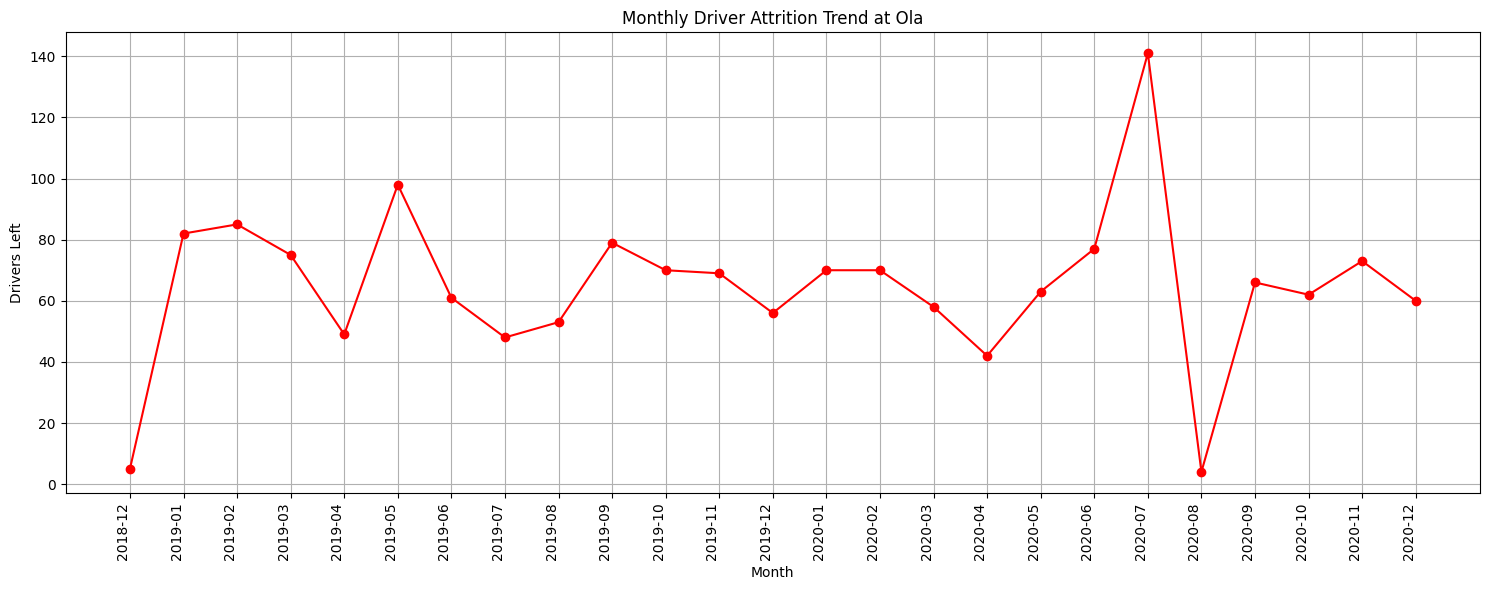

In [52]:
# Converting 'Month' to string for proper labeling
left_df['Month'] = left_df['Month'].astype(str)

plt.figure(figsize=(15,6))
plt.plot(left_df['Month'], left_df['Drivers Left'], marker='o', color='red')

# Rotating x-axis labels for readability
plt.xticks(rotation=90, ha='right')

# Showing fewer labels to avoid clutter
plt.locator_params(axis='x', nbins=20)

# Labels and title
plt.xlabel('Month')
plt.ylabel('Drivers Left')
plt.title('Monthly Driver Attrition Trend at Ola')
plt.tight_layout()
plt.grid(True)
plt.show()



Observation:



*   Attrition was consistently high from Jan 2019 to mid-2020, often between 70–100 drivers/month.
*   A sharp spike is seen in July 2020, where attrition crossed 140 drivers.


*   This was followed by a steep drop in August 2020, where attrition almost hit zero.
*   From September to December 2020, the attrition trend remained stable around 60–75 drivers/month.


Insight:



*   The July 2020 spike could be linked to COVID-19-related uncertainty, causing many drivers to leave suddenly.
*   The August dip might suggest a temporary halt in operations or updates in driver records.


*   The post-August stability hints at a possible recovery phase, with Ola managing to retain more drivers consistently.









# Average Tenure of Drivers who left

In [53]:
# Tenure for drivers who left
df['tenure_days'] = (df['LastWorkingDate'] - df['Dateofjoining']).dt.days
avg_tenure_left = df['tenure_days'].mean()
print(f"Average tenure of drivers who left: {avg_tenure_left:.2f} days")

Average tenure of drivers who left: 357.57 days


Observation:



*   On average, drivers who left Ola worked for about a year before exiting the company.

Insight:

*   This suggests that driver retention may be a challenge, with many leaving within 12 months of joining


*   It could indicate issues like job dissatisfaction, better opportunities elsewhere, or operational pressures.
*   Ola may want to explore why drivers are leaving around the 1-year mark and look into improving long-term engagement through incentives or support programs.





# Average Tenure of all the Drivers

In [54]:
# Tenure for all drivers (active + left)
today = pd.Timestamp.today()
df['tenure_all'] = (df['LastWorkingDate'].fillna(today) - df['Dateofjoining']).dt.days
avg_tenure_all = df['tenure_all'].mean()
print(f"Average tenure of all drivers: {avg_tenure_all:.2f} days")

Average tenure of all drivers: 2472.30 days


Observation:



*   On average, Ola drivers including both active and exited ones have been with the company for about 6 years approx.

Insight:

*   This shows that many drivers are staying long-term, indicating a core group of loyal drivers who’ve been with Ola since the early days.


*   However, when compared with the 1-year average tenure of drivers who left, it highlights a clear divide while some leave early, others stick around for years.
*   Ola could study what keeps the long term drivers engaged and use those strategies to boost retention for newer recruits.





# Feature Engineering

In [55]:
# Creating target column: 1 if driver left, 0 if still working
df['Left'] = df['LastWorkingDate'].notna().astype(int)

In [56]:
# Sample data
print(df[['Driver_ID', 'Dateofjoining', 'LastWorkingDate', 'Left']].head())

   Driver_ID Dateofjoining LastWorkingDate  Left
0          1    2018-12-24             NaT     0
1          1    2018-12-24             NaT     0
2          1    2018-12-24      2019-03-11     1
3          2    2020-11-06             NaT     0
4          2    2020-11-06             NaT     0


This shows that "Left" column cointain the boolean values where 0= Active and 1=Left

In [57]:
# Count of left vs active
print("\nLeft (1) vs Active (0) drivers:")
print(df['Left'].value_counts())


Left (1) vs Active (0) drivers:
Left
0    17488
1     1616
Name: count, dtype: int64


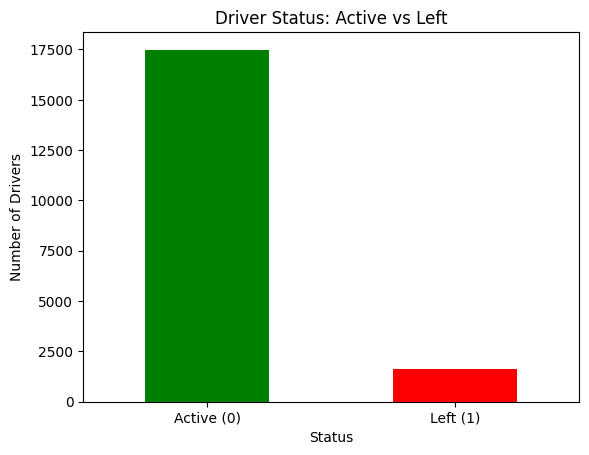

In [58]:
# Bar chart for Left vs Active
df['Left'].value_counts().sort_index().plot(kind='bar', color=['green', 'red'])
plt.xticks([0, 1], ['Active (0)', 'Left (1)'], rotation=0)
plt.title('Driver Status: Active vs Left')
plt.xlabel('Status')
plt.ylabel('Number of Drivers')
plt.show()

Observation:



*   The number of active drivers (green bar) is significantly higher than those who have left (Red bar).
*   Around 17,488 drivers are currently active.

*   Only about 1,800 drivers have left the company.


Insight:

*   Ola seems to be doing well in retaining its drivers overall.
*   The attrition rate appears low, which is a positive sign.
*   Still, understanding the reasons behind the 1,800 exits could help improve retention even more.
*   Addressing those issues could strengthen driver satisfaction and loyalty.










# Additional features we can get from Dateofjoining

In [59]:
# 1. Year, Month, Day of Week, Quarter from joining date
df['Year_Joining'] = df['Dateofjoining'].dt.year
df['Month_Joining'] = df['Dateofjoining'].dt.month
df['DayOfWeek_Joining'] = df['Dateofjoining'].dt.dayofweek  # 0 = Monday
df['Quarter_Joining'] = df['Dateofjoining'].dt.quarter

df_unique = df.drop_duplicates(subset=['Driver_ID', 'Dateofjoining'])
print(df_unique[['Driver_ID', 'Dateofjoining', 'Year_Joining', 'Month_Joining', 'DayOfWeek_Joining', 'Quarter_Joining']].head())


    Driver_ID Dateofjoining  Year_Joining  Month_Joining  DayOfWeek_Joining  \
0           1    2018-12-24          2018             12                  0   
3           2    2020-11-06          2020             11                  4   
5           4    2019-12-07          2019             12                  5   
10          5    2019-01-09          2019              1                  2   
13          6    2020-07-31          2020              7                  4   

    Quarter_Joining  
0                 4  
3                 4  
5                 4  
10                1  
13                3  


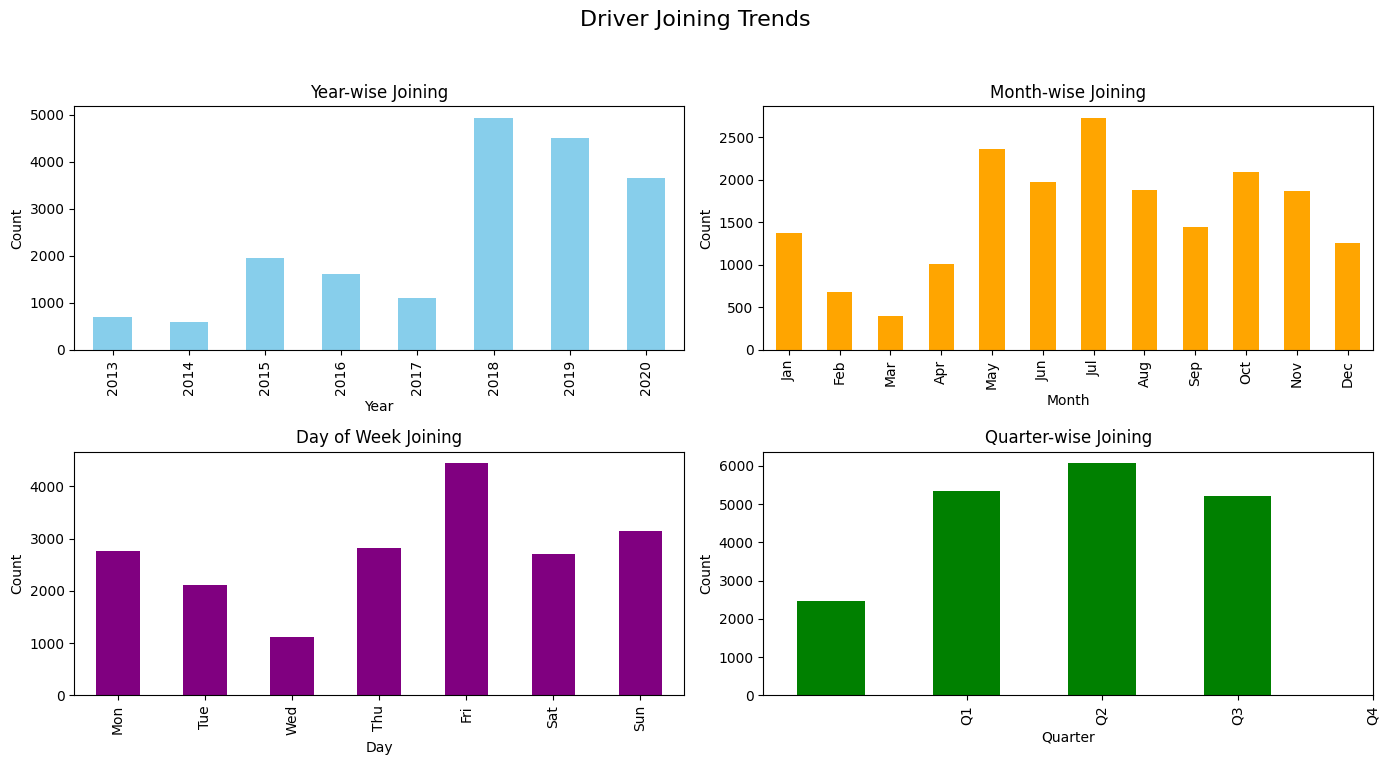

In [60]:
# Visualisation

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Driver Joining Trends", fontsize=16)

# Year wise
df['Year_Joining'].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title("Year-wise Joining")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Count")

# Month wise
df['Month_Joining'].value_counts().sort_index().plot(kind='bar', color='orange', ax=axs[0, 1])
axs[0, 1].set_title("Month-wise Joining")
axs[0, 1].set_xlabel("Month")
axs[0, 1].set_ylabel("Count")
axs[0, 1].set_xticks(range(12))
axs[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Day of Week
df['DayOfWeek_Joining'].value_counts().sort_index().plot(kind='bar', color='purple', ax=axs[1, 0])
axs[1, 0].set_title("Day of Week Joining")
axs[1, 0].set_xlabel("Day")
axs[1, 0].set_ylabel("Count")
axs[1, 0].set_xticks(range(7))
axs[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Quarter wise
df['Quarter_Joining'].value_counts().sort_index().plot(kind='bar', color='green', ax=axs[1, 1])
axs[1, 1].set_title("Quarter-wise Joining")
axs[1, 1].set_xlabel("Quarter")
axs[1, 1].set_ylabel("Count")
axs[1, 1].set_xticks(range(1, 5))
axs[1, 1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Year Wise Joining

Observation:



*   Most drivers joined between 2018 and 2020.
*   There was a sharp rise in 2018, with over 4,000 joinings.

Insights:



*   Ola probably expanded rapidly during these years, possibly due to business growth, new city launches, or high driver demand.


# Month Wise Joining

Observation:



*   May, June, and July saw the highest number of driver joinings.
*   March had the lowest.

Insight:



*   Mid-year might be a preferred time for joining due to school holidays, weather, or seasonal offers from Ola for driver onboarding.

# Day of week joining

Observation:


*   Friday had the highest number of driver joinings.
*   Wednesday had the least.

Insight:



*   End of the workweek (especially Friday) might be chosen for onboarding due to fewer personal work commitments or company scheduling preferences.

# Quater wise joining


Observation:

*   Quarter 2 (April to June) had the most joinings.
*   Quarter 4 had the least.

Insight:



*   Q2 might align with new business plans, incentives, or budget cycles encouraging more onboarding. Q4 could be slower due to festivals or year-end closures.


















In [61]:
# 2. Tenure group for drivers who left based on days worked
tenure_bins = [0, 90, 180, 365, 730, df['tenure_days'].max()]
tenure_labels = ['<3 Months', '3-6 Months', '6-12 Months', '1-2 Years', '>2 Years']
df['TenureGroup_Left'] = pd.cut(df['tenure_days'], bins=tenure_bins, labels=tenure_labels, right=False)

print(df['TenureGroup_Left'].value_counts(dropna=False))


TenureGroup_Left
NaN            17489
3-6 Months       475
6-12 Months      359
<3 Months        349
1-2 Years        222
>2 Years         210
Name: count, dtype: int64


/tmp/ipython-input-62-1940226157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='Reds')


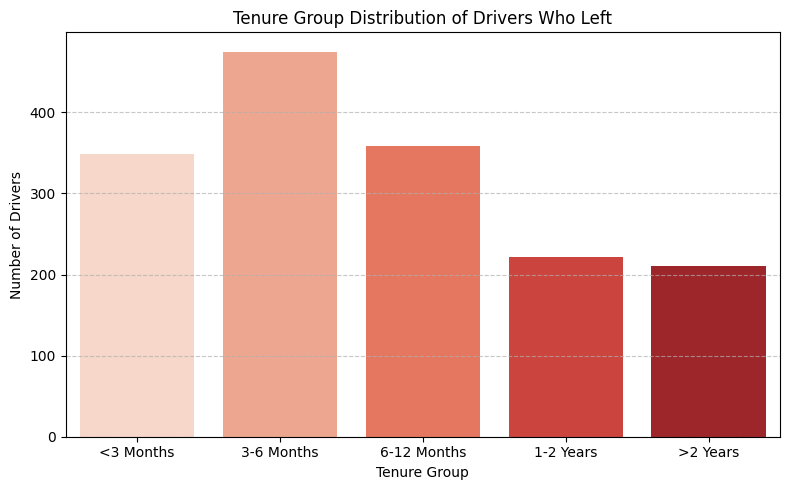

In [62]:
# Visualisation
import seaborn as sns
tenure_counts = df['TenureGroup_Left'].value_counts().sort_index()

# Plotting bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='Reds')

plt.title('Tenure Group Distribution of Drivers Who Left')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observation:



*   The highest number of drivers who left were in the 3–6 months group are 475.
*   Very few drivers left after more than 2 years are 210.
*   About 17,489 drivers have no tenure recorded (they are still working).

Insight:



*   Many drivers quit within the first 6 months, showing a tough early phase maybe due to job mismatch, low earnings, or lack of support.
*   Drivers who cross 1–2 years tend to stay longer, suggesting better stability once they're settled.
*   The huge number of NaNs means most drivers are currently active.










In [63]:
# 3. Tenure group for all drivers including active ones
tenure_bins_all = [0, 90, 180, 365, 730, 1095, df['tenure_all'].max()]
tenure_labels_all = ['<3 Months', '3-6 Months', '6-12 Months', '1-2 Years', '2-3 Years', '>3 Years']
df['TenureGroup_All'] = pd.cut(df['tenure_all'], bins=tenure_bins_all, labels=tenure_labels_all, right=False)

print(df['TenureGroup_All'].value_counts(dropna=False))


TenureGroup_All
>3 Years       17600
3-6 Months       475
6-12 Months      359
<3 Months        349
1-2 Years        222
2-3 Years         75
NaN               24
Name: count, dtype: int64


/tmp/ipython-input-64-1625326647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_all_counts.index, y=tenure_all_counts.values, palette='Blues')


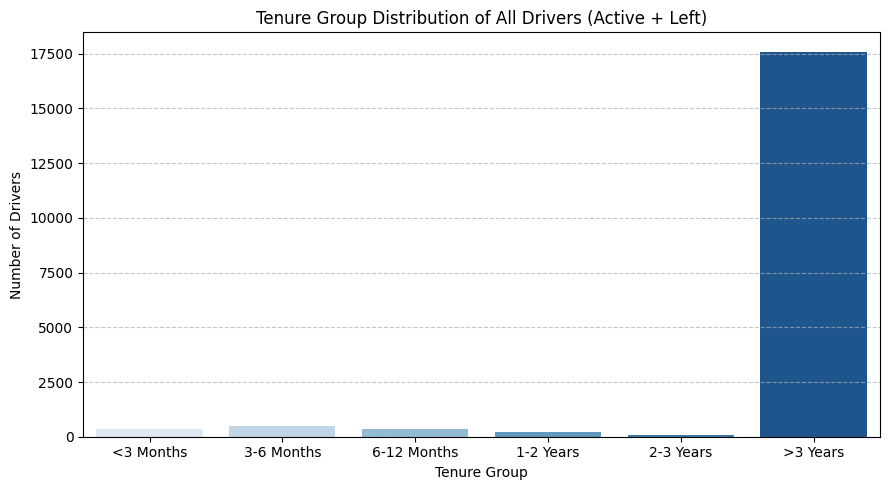

In [64]:
# Visualisation
tenure_all_counts = df['TenureGroup_All'].value_counts().sort_index()

# Plotting bar chart
plt.figure(figsize=(9,5))
sns.barplot(x=tenure_all_counts.index, y=tenure_all_counts.values, palette='Blues')

plt.title('Tenure Group Distribution of All Drivers (Active + Left)')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Observation:


*  Above 3 Years group has the highest count (17,600 drivers).
*   Very few drivers fall in the 2–3 Years group (only 75), which is unusually low.
*   Early tenure groups like <3 Months, 3–6 Months, and 6–12 Months still show a significant count.
*   Only 24 records are missing (NaN), which is very low and manageable.

Insight:



*   Most drivers are long-term: Over 17k drivers have been with Ola for more than 3 years, showing good retention.
*   The sharp drop in the 2–3 year group may hint at either,
drivers either leave early or stay much longer, skipping the middle or data entry errors or gaps around that range
*   Overall, Ola seems to have a strong base of experienced drivers, but early dropout still exists and should be addressed with better support in the first year.












# Exploratory Data Analysis (EDA)

# Distribution of Age, Income and Business value

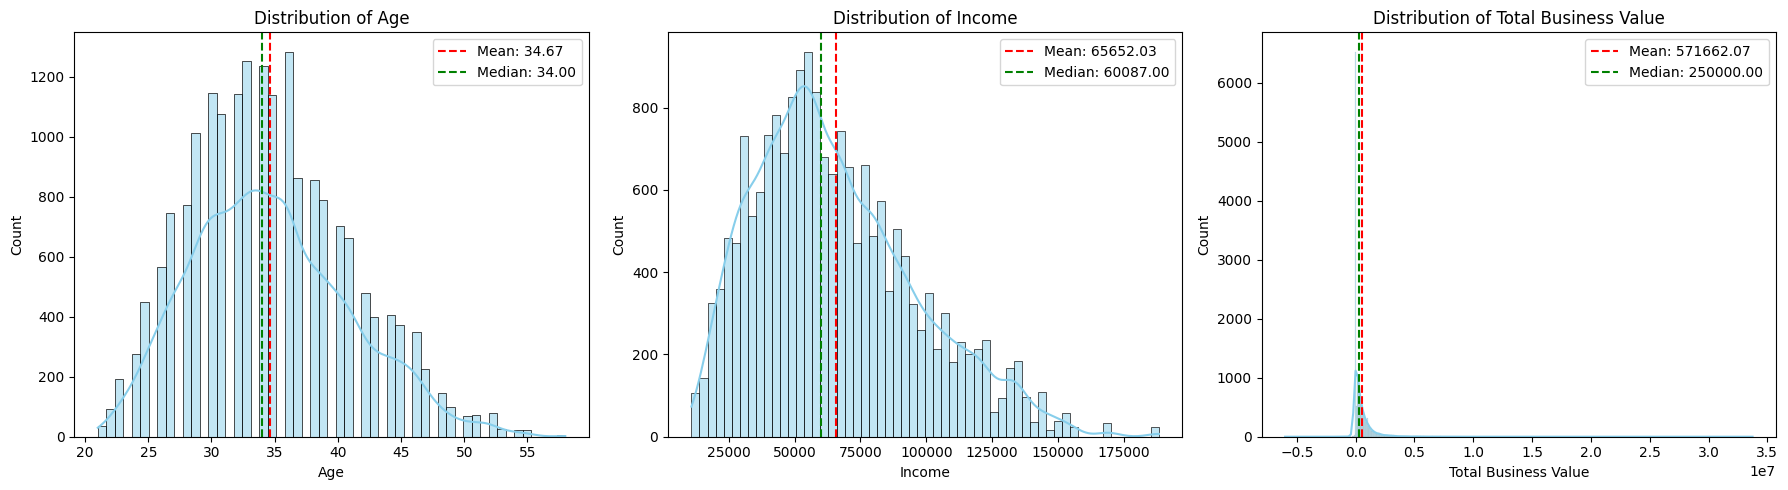

In [65]:

cols = ['Age', 'Income', 'Total Business Value']

plt.figure(figsize=(18, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean: {df[col].mean():.2f}")
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f"Median: {df[col].median():.2f}")
    plt.legend()
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



* Driver Ages: They look to be mostly in their early to mid 30s, with the average age at 34 and a half. It’s a pretty steady group, age-wise, so we have a relatively young, stable workforce.

* Driver Pay: In terms of driver earnings the average is about Rs 65,652, actually they are able to earn around Rs 60,087. This means there are some high earners really bumping up that average. Perhaps they are recieving some sweet bonuses or rewards for being in the top performers list.

* Total Business Value: This is where it becomes really interesting! There’s a wide disparity in business brought in by each driver. The average is around Rs5.7 Lakhs and the average driver closer to Rs 2.5 Lakhs. What this shouts is that too few superstar drivers are driving a huge part of our overall business, while many are driving fewer trips. It's definitely a "long-tail" situation.

# Quarterly Rating vs Income & Business Value

/tmp/ipython-input-66-3408732001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quarterly Rating', y='Income', data=df, palette='coolwarm')


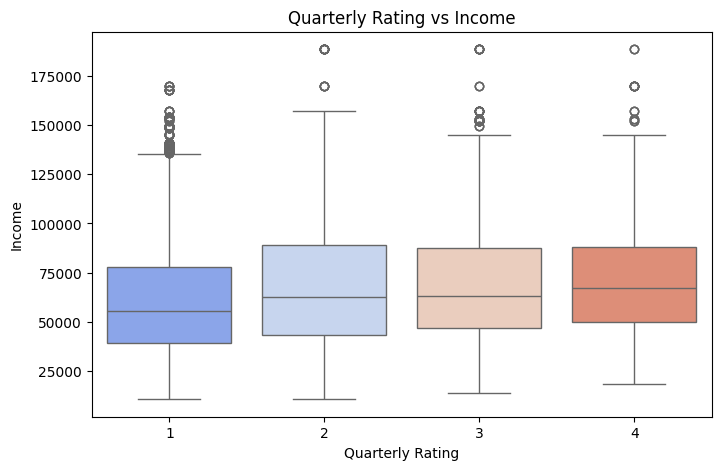

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Quarterly Rating', y='Income', data=df, palette='coolwarm')
plt.title("Quarterly Rating vs Income")
plt.show()

#rating vs income

Observation:


* The median income is approximately the same for all rating categories.

* There are more high income outliers Rs 1.5-1.75 Lakhs in the rating group.

* The income spread in all rating categories looks wide, but there’s no obvious up-trend as ratings get better.

Insight:

* But increased ratings don’t always equal parallel increases in income. This indicates that either the incentive or performance schema isn’t completely lined up in some cases, lower-rated drivers are still earning more than higher rated drivers.

* Ola would probably want to reconsider this performance (rating) to income correlation and make high performing drivers feel more paid.

/tmp/ipython-input-67-1489055566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Quarterly Rating', y='Total Business Value', data=df, palette='muted')


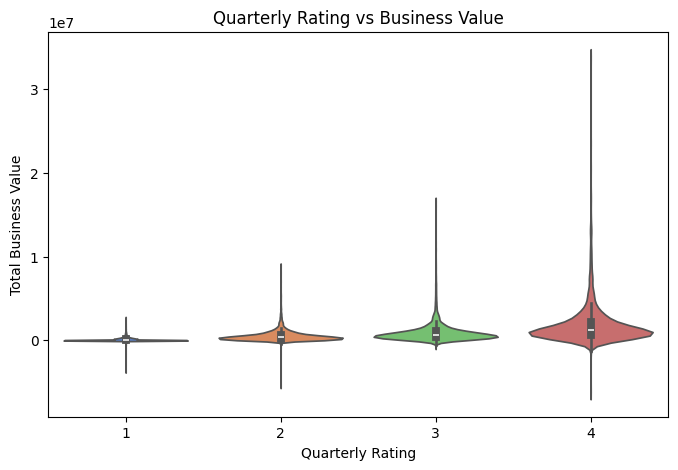

In [67]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Quarterly Rating', y='Total Business Value', data=df, palette='muted')
plt.title("Quarterly Rating vs Business Value")
plt.show()

#rating vs business value

Observation:

* Values of business value distributions look relatively similar between rating 1 and 4.

* Ratings 3 and 4 have broader distributions with a handful of high achievers pulling up the value up.

* The variance of rating 1 is very low and this means the business outcome of drivers in this categorical group is consistently low.

Insight:

* Drivers rated 1 consistently contribute far less business  that is a shown.

* But there are no clear distinctions between ratings 2 through 4, which can indicate insensitivity of the rating system.

* Maybe Ola should look at introducing more granularity to this rating systems or add more KPIs to clearly differentiate who are drivers at the top so that  the driver at top can be developed to do even better.

# Monthly Trend in Income and Business Value

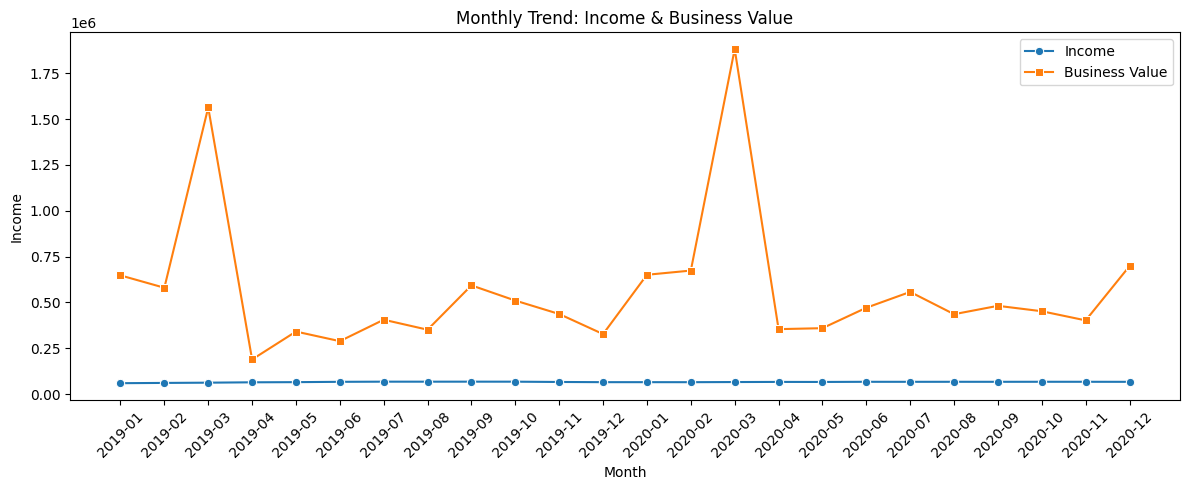

In [68]:
df['Date'] = pd.to_datetime(df['MMM-YY'], format='%m/%d/%y') # convert 'MMM-YY' to datetime
df['Month'] = df['Date'].dt.to_period('M')

monthly_data = df.groupby('Month')[['Income', 'Total Business Value']].mean().reset_index()
monthly_data['Month'] = monthly_data['Month'].astype(str) # Convert to string for plotting

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_data, x='Month', y='Income', marker='o', label='Income')
sns.lineplot(data=monthly_data, x='Month', y='Total Business Value', marker='s', label='Business Value')
plt.title("Monthly Trend: Income & Business Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Observations:

* Business Value experiences increase in March 2019 and March 2020.

* There is no variation in income from one month to another.

Insights:

* March spikes could be the result of seasonal demand or special promotions trends

* Not paying based on driver performance may affect motivation.

* Expanded ability to integrate incentives during peak months.

# Missing Values Handeling

In [69]:
df.isnull().sum() # showing Null values in the dataset

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [70]:
# Filling numerical missing values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling categorical missing values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['TenureGroup_All'].fillna(df['TenureGroup_All'].mode()[0], inplace=True)




/tmp/ipython-input-70-2804436448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-70-2804436448.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [71]:
df.isnull().sum() # After Missing values imputaion

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


After missing values imputation we can see
Age had 61 missing values that is filled with  median
Gender had 52 missing values that is filled with Mode and Tenure agroup all filled with mode according to the most frequent category.

Lastworkingdays, tenure_days and tenuregroup_left has null because of people actively working

# Correlation and Relationships

# Correlation between Age and Income

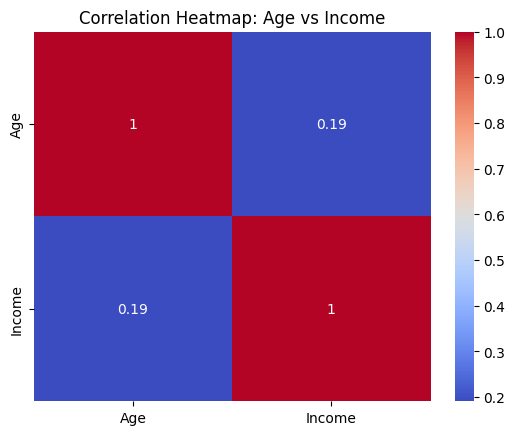

In [72]:

# Creating Age and Income corelation
corr_data = df[['Age', 'Income']]
corr_matrix = corr_data.corr()
# Ploting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Age vs Income")
plt.show()


Observation:
* we can see the corelation between Age and Income is 0.19

Insight:
* we can see a weak corelation between Age and Income.
* other factors like experience , performance or city might have greater influence on income other than age alone.

# Education_Level and City affect Total Business Value

Education level vs Total business value

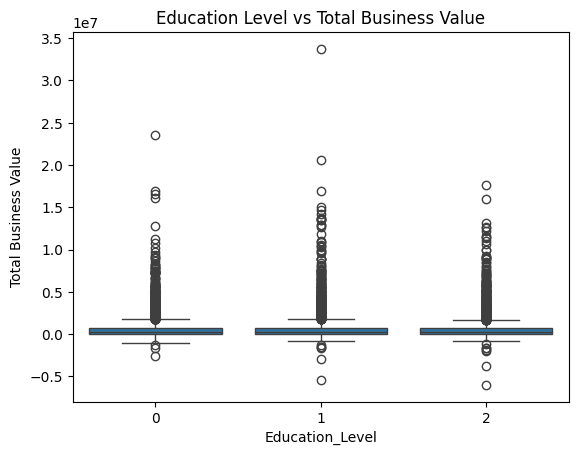

In [73]:
# Boxplot for Education_Level vs Total Business Value
sns.boxplot(x='Education_Level', y='Total Business Value', data=df)
plt.title('Education Level vs Total Business Value')
plt.show()

Observation:

* There are no major difference in total business values accross different education levels
* 0, 1 and 2 and have same median and range and extreme outliers are there in all of them
* So, education level does not impact much on total business value.




### City affect Total business

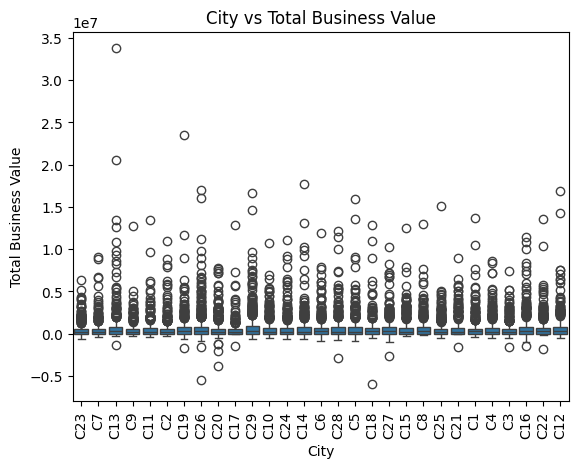

In [74]:
# Boxplot for City vs Total Business Value
sns.boxplot(x='City', y='Total Business Value', data=df)
plt.title('City vs Total Business Value')
plt.xticks(rotation=90)
plt.show()

Observation:
* We can see large variation in total business across different cities
* C23,C7, C11 and C20 has more of outliers which suggest that drivers in some cities perform better for total business to grow
* So city has strong influence on total business than compared to education level

Drivers and higher Quaterly rating

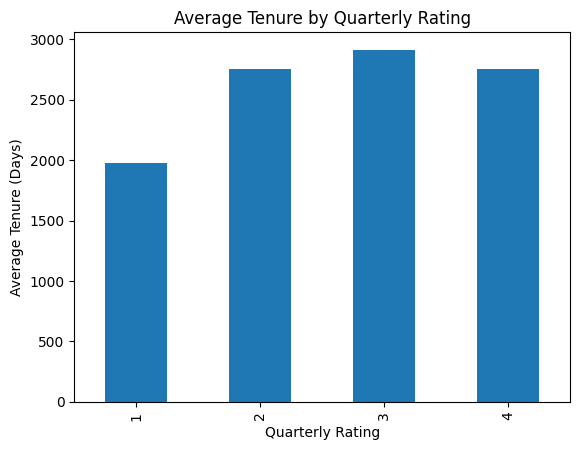

In [75]:
# Compare average tenure for different ratings
df.groupby('Quarterly Rating')['tenure_all'].mean().plot(kind='bar')
plt.title('Average Tenure by Quarterly Rating')
plt.ylabel('Average Tenure (Days)')
plt.show()


Observation:
* Drivers with the quaterly rating of 3 has the highest average tenure
* Drivers with quaterly rating of 1 has the lowest average tenure
* Drivers with quaterly rating of 2 and 4 has same average tenure

Insight:
* High rated drivers tends to stay longer the company as we can see from the above bar chart
* There is positive corelation between performance rating and retention.
* This suggest that driver's decision to stay depends on their performance and satisafction.

# Strategies to implement to improve driver retention



*   Addressing early chrun: Focusing on new drivers by enhancing onboard with proper training programme and clear expectations. Proactively monitoring their performance from very early stage and support during 1st year of tenure.

*   Manage Income and Business values: Implement new and attractive incentive plans that will reward consistant employees. Incentives should also be introduced for average drivers to increase business values and for motivation on all levels.

*  Optimize Recruitment and Retention:  Shift towards a more consistent and predictable recruitment pace to avoid large fluctuations that might lead to periods of low demand for drivers.
*  City specific strategy: Focus on underperforming cities like C3, C8 and C9 and provide assisatance and support to the drivers acoording the challenges.


*   Leverage long term drivers: implement loyalty programmes for drivers who stay in the company for many years. Seek feedback from these drivers and use it as insights to motivate the new drivers or new recruit.




# Key Performance metrics that needs attention



*   Tenurity: Drivers with low tenurity within 1st years of service are key group requiring target intervention. The average tenure of drivers are those who left within 1year indicating critical period for retention level.

*   Performance metrics of Income and Business value: Drivers who falls into the lower or average tiers of income and business value require target intervention. Strategies to be made to increase their earnings and business contribution.
*   Grographic group or Cities: Specific cities like C23, C7,C11 and C20 show significant outliers in business value which suggest that drivers in these areas require target analysis and support and getting incentive programme.


*   Quaterly rating: The analysis indicates that  most drivers are rated 2/4 a more discriminative rating system  or intervention  based on rating trends could be benificial to encourage performance improvement and for better incentives.



# Actionable Insights and Recommendations influencing driver retention:



*   Early Departure: Many drivers leave within their first year pointing to challenges during initial engagement or unmet expectations.

*   Performance Disparity: A small group of high performing drivers generates a large portion of the business and income leading to dissatisfaction among average performers.

*   Recruitment Volatility: Inconsistent hiring spikes and dips may result in periods of low demand for drivers impacting their earnings and satisfaction.
*  City Specific Influence: Certain cities exhibit significant variations in driver business value suggesting local market conditions play a crucial role in performance and retention.


*   External Shocks: Events like the COVID-19 pandemic can cause sharp sudden increases in attrition highlighting vulnerability to external factors.






# Strategies to Improve Driver Retention

Improve New Driver Experience:


*   Implementing a good onboarding program with mentorship from seasoned drivers
*   Provide clear and realistic expectations about the earnings and working conditions from their staring day.

*  Actively check with new drivers in their first 3 to 6 months and offer extra support or training if they struggle.

Boost Driver Motivation & Fairness:

*  Make attractive incentive programs that reward consistent efforts and not just top performance across all driver in different levels.



*   Implement skill building resources like efficient routing, customer service tips to help all drivers increase their business value
*   Ensure complete transparency in how earnings, bonuses, and incentives can be acheived

Optimize Hiring & Local Operations:



*   Adopt to a  more stable and predictable recruitment schedule to better match a driver supply with demand.

*   Conduct deep dives into city specific data to understand local performance drivers and provide support and incentives accordingly.

Value Long-Term Drivers:

*  Introduce loyalty programs and benefits to recognize and reward drivers who stay with Ola for longer period of time.

*   Implement feedbacks to learn from both departing and long term drivers to continuously refine retention strategies as well.















# Conclusion

 Ola should implement these data backed solutions which will not only improve driver satisfaction and retention but also strengthen the competitive edge against other ride service platforms in the market. A more stable and engaged driver base directly translates to better customer service, reduced recruitment costs which eventually will give higher long term profitability.

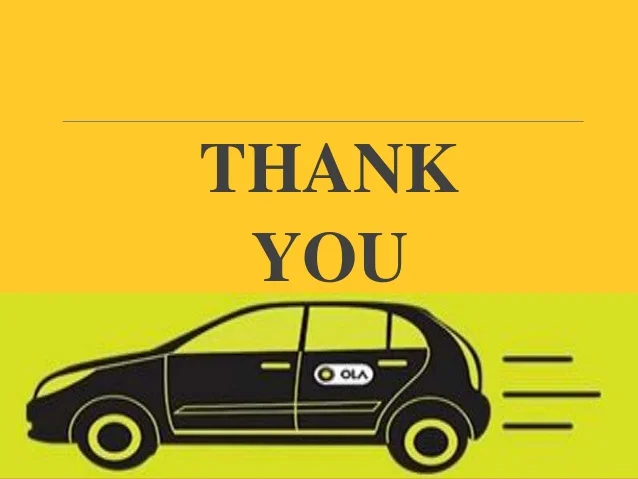